In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import OneHotEncoder,RobustScaler
import seaborn as sns

In [3]:
ncca_sites = pd.read_csv("assessed_ncca2010_siteinfo.revised.06212016.csv")

In [4]:
ncca_raw = pd.read_csv("assessed_ncca2010_waterchem.csv")

In [5]:
ncca_sites.head()

,UID,SITE_ID,STATE,VISIT_NO,DATE_COL,WTBDY_NM,SITESAMP,INDEX_VISIT,EPA_REG,NCCR_REG,...,NPSPARK,PANEL,STATUS10,STRATUM,TNT,WGT_CAT,WGT_NCCA10,RSRC_CLASS,QA_CODES,COMMENT
0,59,NCCA10-1111,CA,1.0,1-Jul-10,Mission Bay,Y,Y,9,West,...,NaN,Base,Target_Sampled,CalP_Other,Target,NCA_CA_CalP_Other,2.503632,NCA_Estuarine_Coastal,NaN,NaN
1,60,NCCA10-1119,CA,1.0,1-Jul-10,San Diego Bay,Y,Y,9,West,...,NaN,Base,Target_Sampled,CalP_Other,Target,NCA_CA_CalP_Other,5.255002,NCA_Estuarine_Coastal,NaN,NaN
2,61,NCCA10-1123,CA,1.0,1-Jul-10,Mission Bay,Y,Y,9,West,...,NaN,Base,Target_Sampled,CalP_Other,Target,NCA_CA_CalP_Other,2.503632,NCA_Estuarine_Coastal,NaN,NaN
3,62,NCCA10-1127,CA,1.0,1-Jul-10,San Diego Bay,Y,Y,9,West,...,NaN,Base,Target_Sampled,CalP_Other,Target,NCA_CA_CalP_Other,5.255002,NCA_Estuarine_Coastal,NaN,NaN
4,63,NCCA10-1133,NC,1.0,9-Jun-10,White Oak River,Y,Y,4,Southeast,...,NaN,Revisit,Target_Sampled,CarP_Albemarle_Pamlico_Sounds,Target,NCA_NC_CarP_Albemarle_Pamlico_Sounds,75.994127,NCA_Estuarine_Coastal,NaN,NaN


In [6]:
ncca_raw.head()

,UID,SITE_ID,STATE,DATE_COL,BATCH_ID,PARAMETER,PARAMETER_NAME,RESULT,UNITS,MDL,MRL,PQL,DATE_ANALYZED,HOLDING_TIME,QACODE,LAB_SAMPLE_ID,SAMPLE_ID,METHOD
0,59,NCCA10-1111,CA,7/1/2010,100714.1,NTL,Total Nitrogen,0.407500,mg N/L,0.0150,0.0300,NaN,7/14/2010,13.0,NaN,1010242,568671.0,NaN
1,59,NCCA10-1111,CA,7/1/2010,100708.1,NO3NO2,Nitrate/Nitrite,0.014000,mg N/L,0.0020,0.0040,NaN,7/8/2010,7.0,NaN,1010242,568673.0,NaN
2,59,NCCA10-1111,CA,7/1/2010,100708.1,SRP,Dissolved Inorganic Phosphate,0.028000,mg P/L,0.0027,0.0054,NaN,7/8/2010,7.0,NaN,1010242,568673.0,NaN
3,59,NCCA10-1111,CA,7/1/2010,IM_CALCULATED,DIN,Dissolved Inorganic Nitrogen,0.014000,mg N/L,NaN,NaN,NaN,NaN,NaN,Q23,NaN,NaN,NaN
4,59,NCCA10-1111,CA,7/1/2010,100714.1,PTL,Total Phosphorus,0.061254,mg P/L,0.0012,0.0024,NaN,7/14/2010,13.0,NaN,1010242,568671.0,NaN


In [7]:
#merge dataset
raw_data = ncca_raw.merge(ncca_sites, how='left', on=['UID','SITE_ID','STATE'])
raw_data.head()

,UID,SITE_ID,STATE,DATE_COL_x,BATCH_ID,PARAMETER,PARAMETER_NAME,RESULT,UNITS,MDL,...,NPSPARK,PANEL,STATUS10,STRATUM,TNT,WGT_CAT,WGT_NCCA10,RSRC_CLASS,QA_CODES,COMMENT
0,59,NCCA10-1111,CA,7/1/2010,100714.1,NTL,Total Nitrogen,0.407500,mg N/L,0.0150,...,NaN,Base,Target_Sampled,CalP_Other,Target,NCA_CA_CalP_Other,2.503632,NCA_Estuarine_Coastal,NaN,NaN
1,59,NCCA10-1111,CA,7/1/2010,100708.1,NO3NO2,Nitrate/Nitrite,0.014000,mg N/L,0.0020,...,NaN,Base,Target_Sampled,CalP_Other,Target,NCA_CA_CalP_Other,2.503632,NCA_Estuarine_Coastal,NaN,NaN
2,59,NCCA10-1111,CA,7/1/2010,100708.1,SRP,Dissolved Inorganic Phosphate,0.028000,mg P/L,0.0027,...,NaN,Base,Target_Sampled,CalP_Other,Target,NCA_CA_CalP_Other,2.503632,NCA_Estuarine_Coastal,NaN,NaN
3,59,NCCA10-1111,CA,7/1/2010,IM_CALCULATED,DIN,Dissolved Inorganic Nitrogen,0.014000,mg N/L,NaN,...,NaN,Base,Target_Sampled,CalP_Other,Target,NCA_CA_CalP_Other,2.503632,NCA_Estuarine_Coastal,NaN,NaN
4,59,NCCA10-1111,CA,7/1/2010,100714.1,PTL,Total Phosphorus,0.061254,mg P/L,0.0012,...,NaN,Base,Target_Sampled,CalP_Other,Target,NCA_CA_CalP_Other,2.503632,NCA_Estuarine_Coastal,NaN,NaN


In [8]:
# checking if there is any missing value.
raw_data.isnull().sum()

UID                       0
SITE_ID                   0
STATE                     0
DATE_COL_x                0
BATCH_ID                  0
PARAMETER                 0
PARAMETER_NAME            0
RESULT                    0
UNITS                     0
MDL                    1092
MRL                    4088
PQL                    7722
DATE_ANALYZED          1144
HOLDING_TIME           1414
QACODE                 4660
LAB_SAMPLE_ID          1354
SAMPLE_ID              1191
METHOD                 7700
VISIT_NO                  0
DATE_COL_y                0
WTBDY_NM                  0
SITESAMP                  0
INDEX_VISIT               0
EPA_REG                   0
NCCR_REG                  0
NCA_REGION                0
COUNTRY                   0
PROVINCE                  0
STATION_DEPTH             0
STATION_DEPTH_UNITS       0
ALAT_DD                   0
ALON_DD                   0
MAP_DATUM                 0
DSNTYPE                   0
MDCATY                    0
NEP_NM              

In [9]:
raw_data1 = raw_data[['UID', 'SITE_ID', 'STATE', 'DATE_COL_x', 'PARAMETER_NAME', 'RESULT', 'UNITS', 'WTBDY_NM', 'COUNTRY','PROVINCE','NCCR_REG','ALAT_DD','ALON_DD']]
raw_data1


,UID,SITE_ID,STATE,DATE_COL_x,PARAMETER_NAME,RESULT,UNITS,WTBDY_NM,COUNTRY,PROVINCE,NCCR_REG,ALAT_DD,ALON_DD
0,59,NCCA10-1111,CA,7/1/2010,Total Nitrogen,0.407500,mg N/L,Mission Bay,USA,Californian Province,West,32.77361,-117.21471
1,59,NCCA10-1111,CA,7/1/2010,Nitrate/Nitrite,0.014000,mg N/L,Mission Bay,USA,Californian Province,West,32.77361,-117.21471
2,59,NCCA10-1111,CA,7/1/2010,Dissolved Inorganic Phosphate,0.028000,mg P/L,Mission Bay,USA,Californian Province,West,32.77361,-117.21471
3,59,NCCA10-1111,CA,7/1/2010,Dissolved Inorganic Nitrogen,0.014000,mg N/L,Mission Bay,USA,Californian Province,West,32.77361,-117.21471
4,59,NCCA10-1111,CA,7/1/2010,Total Phosphorus,0.061254,mg P/L,Mission Bay,USA,Californian Province,West,32.77361,-117.21471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7871,16731,NCCA10-1108,CA,6/29/2010,Total Nitrogen,0.228750,mg N/L,San Diego Bay,USA,Californian Province,West,32.66243,-117.12712
7872,16731,NCCA10-1108,CA,6/29/2010,Total Phosphorus,0.041821,mg P/L,San Diego Bay,USA,Californian Province,West,32.66243,-117.12712
7873,16731,NCCA10-1108,CA,6/29/2010,Dissolved Inorganic Phosphate,0.033000,mg P/L,San Diego Bay,USA,Californian Province,West,32.66243,-117.12712
7874,16731,NCCA10-1108,CA,6/29/2010,Ammonia,0.016000,mg N/L,San Diego Bay,USA,Californian Province,West,32.66243,-117.12712


In [10]:
raw_data1.isnull().sum()

UID               0
SITE_ID           0
STATE             0
DATE_COL_x        0
PARAMETER_NAME    0
RESULT            0
UNITS             0
WTBDY_NM          0
COUNTRY           0
PROVINCE          0
NCCR_REG          0
ALAT_DD           0
ALON_DD           0
dtype: int64

In [11]:
for i in range(len(raw_data1)):
    if raw_data1.loc[i, 'UNITS'] == 'ug/L':
        raw_data1.loc[i, 'RESULT'] = raw_data1.loc[i, 'RESULT'] / 1000
        raw_data1.loc[i, 'UNITS'] = 'mg/L'
raw_data1.head()


,UID,SITE_ID,STATE,DATE_COL_x,PARAMETER_NAME,RESULT,UNITS,WTBDY_NM,COUNTRY,PROVINCE,NCCR_REG,ALAT_DD,ALON_DD
0,59,NCCA10-1111,CA,7/1/2010,Total Nitrogen,0.407500,mg N/L,Mission Bay,USA,Californian Province,West,32.77361,-117.21471
1,59,NCCA10-1111,CA,7/1/2010,Nitrate/Nitrite,0.014000,mg N/L,Mission Bay,USA,Californian Province,West,32.77361,-117.21471
2,59,NCCA10-1111,CA,7/1/2010,Dissolved Inorganic Phosphate,0.028000,mg P/L,Mission Bay,USA,Californian Province,West,32.77361,-117.21471
3,59,NCCA10-1111,CA,7/1/2010,Dissolved Inorganic Nitrogen,0.014000,mg N/L,Mission Bay,USA,Californian Province,West,32.77361,-117.21471
4,59,NCCA10-1111,CA,7/1/2010,Total Phosphorus,0.061254,mg P/L,Mission Bay,USA,Californian Province,West,32.77361,-117.21471


In [12]:
raw_data2 = raw_data1.pivot(index=['UID', 'SITE_ID', 'STATE', 'DATE_COL_x', 'UNITS', 'WTBDY_NM', 'COUNTRY','PROVINCE','NCCR_REG','ALAT_DD','ALON_DD'],
 columns=['PARAMETER_NAME'],values='RESULT')
raw_data2 = raw_data2.reset_index()
raw_data2.head()

PARAMETER_NAME,UID,SITE_ID,STATE,DATE_COL_x,UNITS,WTBDY_NM,COUNTRY,PROVINCE,NCCR_REG,ALAT_DD,...,Nitrate,Nitrate/Nitrite,Nitrite,Nitrogen Particulate,Phosphorus Particulate,Total Dissolved Nitrogen,Total Dissolved Phosphorus,Total Kjeldahl Nitrogen,Total Nitrogen,Total Phosphorus
0,59,NCCA10-1111,CA,7/1/2010,mg N/L,Mission Bay,USA,Californian Province,West,32.77361,...,NaN,0.014,NaN,NaN,NaN,NaN,NaN,NaN,0.4075,NaN
1,59,NCCA10-1111,CA,7/1/2010,mg P/L,Mission Bay,USA,Californian Province,West,32.77361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.061254
2,59,NCCA10-1111,CA,7/1/2010,mg/L,Mission Bay,USA,Californian Province,West,32.77361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,60,NCCA10-1119,CA,7/1/2010,mg N/L,San Diego Bay,USA,Californian Province,West,32.71424,...,NaN,0.010,NaN,NaN,NaN,NaN,NaN,NaN,0.2300,NaN
4,60,NCCA10-1119,CA,7/1/2010,mg P/L,San Diego Bay,USA,Californian Province,West,32.71424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037379


In [13]:
raw_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3266 entries, 0 to 3265
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   UID                            3266 non-null   int64  
 1   SITE_ID                        3266 non-null   object 
 2   STATE                          3266 non-null   object 
 3   DATE_COL_x                     3266 non-null   object 
 4   UNITS                          3266 non-null   object 
 5   WTBDY_NM                       3266 non-null   object 
 6   COUNTRY                        3266 non-null   object 
 7   PROVINCE                       3266 non-null   object 
 8   NCCR_REG                       3266 non-null   object 
 9   ALAT_DD                        3266 non-null   float64
 10  ALON_DD                        3266 non-null   float64
 11  Ammonia                        1091 non-null   float64
 12  Chlorophyll A                  1082 non-null   f

In [14]:
raw_data3 = raw_data2.drop(columns = ['Dissolved Inorganic Nitrogen','Dissolved Inorganic Phosphate', 'Dissolved Silica','Nitrate','Nitrate/Nitrite',
 'Nitrite', 'Nitrogen Particulate', 'Phosphorus Particulate','Total Dissolved Nitrogen','Total Dissolved Phosphorus',
 'Total Kjeldahl Nitrogen'])
raw_data3.head()


PARAMETER_NAME,UID,SITE_ID,STATE,DATE_COL_x,UNITS,WTBDY_NM,COUNTRY,PROVINCE,NCCR_REG,ALAT_DD,ALON_DD,Ammonia,Chlorophyll A,Total Nitrogen,Total Phosphorus
0,59,NCCA10-1111,CA,7/1/2010,mg N/L,Mission Bay,USA,Californian Province,West,32.77361,-117.21471,0.00,NaN,0.4075,NaN
1,59,NCCA10-1111,CA,7/1/2010,mg P/L,Mission Bay,USA,Californian Province,West,32.77361,-117.21471,NaN,NaN,NaN,0.061254
2,59,NCCA10-1111,CA,7/1/2010,mg/L,Mission Bay,USA,Californian Province,West,32.77361,-117.21471,NaN,0.00334,NaN,NaN
3,60,NCCA10-1119,CA,7/1/2010,mg N/L,San Diego Bay,USA,Californian Province,West,32.71424,-117.23527,0.01,NaN,0.2300,NaN
4,60,NCCA10-1119,CA,7/1/2010,mg P/L,San Diego Bay,USA,Californian Province,West,32.71424,-117.23527,NaN,NaN,NaN,0.037379


In [15]:
raw_data3 = raw_data3.rename_axis("", axis="columns")
raw_data3.sort_values(by = ['SITE_ID'])


,UID,SITE_ID,STATE,DATE_COL_x,UNITS,WTBDY_NM,COUNTRY,PROVINCE,NCCR_REG,ALAT_DD,ALON_DD,Ammonia,Chlorophyll A,Total Nitrogen,Total Phosphorus
2493,1658,NCCA10-1001,MA,10/7/2010,mg N/L,Buzzards Bay,USA,Virginian Province,Northeast,41.759710,-70.71124,0.035,NaN,0.47500,NaN
2494,1658,NCCA10-1001,MA,10/7/2010,mg P/L,Buzzards Bay,USA,Virginian Province,Northeast,41.759710,-70.71124,NaN,NaN,NaN,0.083190
2495,1658,NCCA10-1001,MA,10/7/2010,mg/L,Buzzards Bay,USA,Virginian Province,Northeast,41.759710,-70.71124,NaN,0.00573,NaN,NaN
2496,1659,NCCA10-1002,MA,8/11/2010,mg N/L,Buzzards Bay,USA,Virginian Province,Northeast,41.662933,-70.72715,0.010,NaN,0.32250,NaN
2497,1659,NCCA10-1002,MA,8/11/2010,mg P/L,Buzzards Bay,USA,Virginian Province,Northeast,41.662933,-70.72715,NaN,NaN,NaN,0.056720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,1740,NCCAGL10-QLM-10-05,IL,7/7/2010,mg P/L,Lake Michigan,USA,Great Lakes Province,Great Lakes,42.342730,-87.82171,NaN,NaN,NaN,0.003825
2650,1740,NCCAGL10-QLM-10-05,IL,7/7/2010,mg N/L,Lake Michigan,USA,Great Lakes Province,Great Lakes,42.342730,-87.82171,0.010,NaN,0.42375,NaN
2655,1741,NCCAGL10-QLM-10-20,IL,7/8/2010,mg/L,Lake Michigan,USA,Great Lakes Province,Great Lakes,41.916390,-87.60204,NaN,0.00033,NaN,NaN
2654,1741,NCCAGL10-QLM-10-20,IL,7/8/2010,mg P/L,Lake Michigan,USA,Great Lakes Province,Great Lakes,41.916390,-87.60204,NaN,NaN,NaN,0.004086


In [16]:
raw_data4 = raw_data3.drop(columns = ['UNITS', 'UID'])

In [17]:
check_dataset = raw_data4.groupby(by = ['SITE_ID','WTBDY_NM','COUNTRY','STATE','PROVINCE', 'DATE_COL_x','NCCR_REG','ALAT_DD','ALON_DD']).nunique()

In [18]:
data1 = raw_data4.groupby(by = ['SITE_ID','WTBDY_NM','COUNTRY','STATE','PROVINCE', 'DATE_COL_x','NCCR_REG','ALAT_DD','ALON_DD']).sum()
data1.head()

,,,,,,,,,Ammonia,Chlorophyll A,Total Nitrogen,Total Phosphorus
SITE_ID,WTBDY_NM,COUNTRY,STATE,PROVINCE,DATE_COL_x,NCCR_REG,ALAT_DD,ALON_DD,,,,
NCCA10-1001,Buzzards Bay,USA,MA,Virginian Province,10/7/2010,Northeast,41.759710,-70.711240,0.035,0.00573,0.47500,0.083190
NCCA10-1002,Buzzards Bay,USA,MA,Virginian Province,8/11/2010,Northeast,41.662933,-70.727150,0.010,0.00282,0.32250,0.056720
NCCA10-1003,Buzzards Bay,USA,MA,Virginian Province,8/13/2010,Northeast,41.492567,-70.965950,0.012,0.00479,0.20875,0.043185
NCCA10-1004,Buzzards Bay,USA,MA,Virginian Province,8/12/2010,Northeast,41.494150,-70.852933,0.011,0.00205,0.25125,0.037015
NCCA10-1005,Buzzards Bay,USA,MA,Virginian Province,8/11/2010,Northeast,41.599133,-70.732633,0.009,0.00401,0.40000,0.052694


In [19]:
data_1 = data1.reset_index()
data_1.head()

,SITE_ID,WTBDY_NM,COUNTRY,STATE,PROVINCE,DATE_COL_x,NCCR_REG,ALAT_DD,ALON_DD,Ammonia,Chlorophyll A,Total Nitrogen,Total Phosphorus
0,NCCA10-1001,Buzzards Bay,USA,MA,Virginian Province,10/7/2010,Northeast,41.759710,-70.711240,0.035,0.00573,0.47500,0.083190
1,NCCA10-1002,Buzzards Bay,USA,MA,Virginian Province,8/11/2010,Northeast,41.662933,-70.727150,0.010,0.00282,0.32250,0.056720
2,NCCA10-1003,Buzzards Bay,USA,MA,Virginian Province,8/13/2010,Northeast,41.492567,-70.965950,0.012,0.00479,0.20875,0.043185
3,NCCA10-1004,Buzzards Bay,USA,MA,Virginian Province,8/12/2010,Northeast,41.494150,-70.852933,0.011,0.00205,0.25125,0.037015
4,NCCA10-1005,Buzzards Bay,USA,MA,Virginian Province,8/11/2010,Northeast,41.599133,-70.732633,0.009,0.00401,0.40000,0.052694


In [20]:
data_1.shape

(1092, 13)

In [21]:
clean_data = data_1.rename(columns = {"Chlorophyll A": "Productivity", "DATE_COL_x":"DATE","ALAT_DD":"LAT","ALON_DD":"LON"})

In [22]:
clean_data

,SITE_ID,WTBDY_NM,COUNTRY,STATE,PROVINCE,DATE,NCCR_REG,LAT,LON,Ammonia,Productivity,Total Nitrogen,Total Phosphorus
0,NCCA10-1001,Buzzards Bay,USA,MA,Virginian Province,10/7/2010,Northeast,41.759710,-70.711240,0.035,0.00573,0.47500,0.083190
1,NCCA10-1002,Buzzards Bay,USA,MA,Virginian Province,8/11/2010,Northeast,41.662933,-70.727150,0.010,0.00282,0.32250,0.056720
2,NCCA10-1003,Buzzards Bay,USA,MA,Virginian Province,8/13/2010,Northeast,41.492567,-70.965950,0.012,0.00479,0.20875,0.043185
3,NCCA10-1004,Buzzards Bay,USA,MA,Virginian Province,8/12/2010,Northeast,41.494150,-70.852933,0.011,0.00205,0.25125,0.037015
4,NCCA10-1005,Buzzards Bay,USA,MA,Virginian Province,8/11/2010,Northeast,41.599133,-70.732633,0.009,0.00401,0.40000,0.052694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NCCAGL10-NPS09-096,Lake Michigan,USA,IN,Great Lakes Province,8/9/2010,Great Lakes,41.669600,-87.180580,0.002,0.00132,0.42125,0.003434
1088,NCCAGL10-NPS09-097,Lake Michigan,USA,IN,Great Lakes Province,8/10/2010,Great Lakes,41.711360,-87.051470,0.001,0.00213,0.43750,0.004226
1089,NCCAGL10-QLM-10-01,Lake Michigan,USA,IL,Great Lakes Province,7/6/2010,Great Lakes,42.467390,-87.779870,0.008,0.00045,0.42250,0.003844
1090,NCCAGL10-QLM-10-05,Lake Michigan,USA,IL,Great Lakes Province,7/7/2010,Great Lakes,42.342730,-87.821710,0.010,0.00030,0.42375,0.003825


In [23]:
clean1 = clean_data.drop(['SITE_ID','WTBDY_NM','COUNTRY','STATE','PROVINCE','NCCR_REG','DATE','SITE_ID'],axis=1)

In [24]:
#Outlier filtering
def outliers(data, col_name, scale=3):##scale--scale generally takes 3
    def box_plot_outliers(data_ser, box_scale):
          ##IQR is scale* (upper quartile - lower quartile)
        IQR = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        #Calculate the upper and lower bound
        val_low = data_ser.quantile(0.25) - IQR 
        val_up = data_ser.quantile(0.75) + IQR  
        rule_low = (data_ser < val_low)         #less than the value of the lower bound
        rule_up = (data_ser > val_up)           #value greater than the upper bound
        return (rule_low, rule_up), (val_low, val_up)
    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]] ##Count if the conditions below rule_low or above rule_up are met
    data_n = data_n.drop(index=index,axis=0)
    print("Deleted: {} data".format(len(index)))
    data_n.reset_index(drop=True, inplace=True)##Take the data after removing outliers
    print("Remaining: {} data".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]#Points below the lower bound
    print("Details of data smaller than the lower bound line:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]#Points above the upper bound
    outliers = data_series.iloc[index_up]
    print("Details of data larger than the upper bound line:")
    print(pd.Series(outliers).describe())
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, ax=ax[1])
    plt.show()
    return data_n

Deleted: 51 data
Remaining: 1041 data
Details of data smaller than the lower bound line:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Productivity, dtype: float64
Details of data larger than the upper bound line:
count    51.000000
mean      0.049967
std       0.027081
min       0.027920
25%       0.031215
50%       0.042960
75%       0.055660
max       0.144630
Name: Productivity, dtype: float64


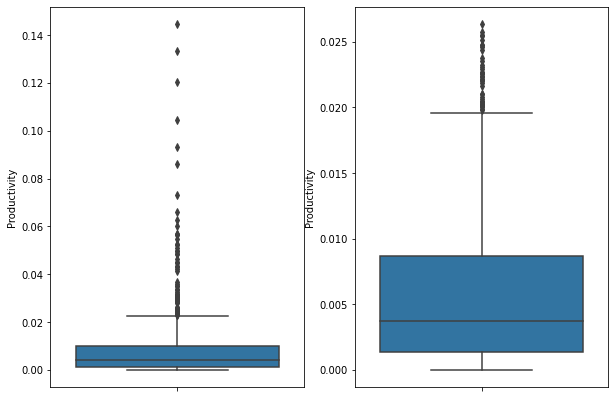

C:\Users\Kaya\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kaya\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


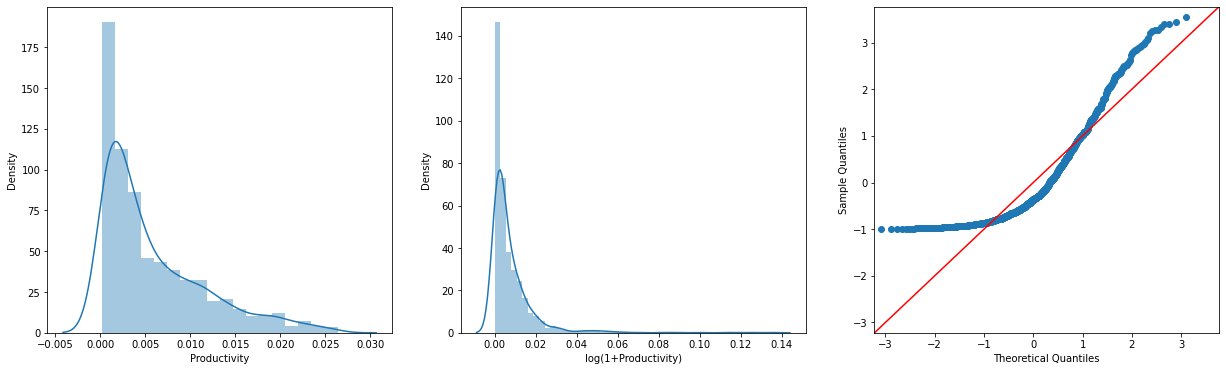

In [25]:
clean1=outliers(clean1,'Productivity',scale=2)
clean1['Productivity'].replace(0,np.nan,inplace=True)
clean1 = clean1.dropna()
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(clean1['Productivity'], ax=axes[0])
sns.distplot(np.log1p(clean_data['Productivity']), ax=axes[1])
axes[1].set_xlabel('log(1+Productivity)')
sm.qqplot(np.log1p(clean1['Productivity'])
          ,stats.norm#distribution
          , fit=True
          , line='45'
          , ax=axes[2])
plt.show()

In [26]:
from sklearn.ensemble import RandomForestRegressor
#贡献度分析
def RF(features,target):
    print("Contribution analysis....")
    #Extract target
    labels = np.array(features[target])
    features= features.drop(target, axis = 1)
    feature_list = list(features.columns)
    features = np.array(features)
    # Using Skicit-learn to split data into training and testing sets
    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels =train_test_split(features, labels, test_size=0.25,random_state=42)  #random_state控制每一步随机是相同的
    #train_features, test_features, train_labels, test_labels =train_test_split(features, labels, test_size=0.25, random_state=42)
    # rf = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.1, gamma=0, subsample=0.8,colsample_bytree=0.9, max_depth=7)  # ,objective ='reg:squarederror'
    rf = RandomForestRegressor(n_estimators=500,random_state=42)    #n_estimators=随机森林数的棵树 rf = RandomForestRegressor(n_estimators=1000, random_state=42)
    # Train the model on training data
    rf.fit(train_features, train_labels)

    # Use the forest's predict method on the test data
    predictions = rf.predict(test_features)
    # Calculate the absolute errors
    errors = abs(predictions - test_labels)
    # Print out the mean absolute error (mae)
    print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / test_labels)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

    # Get numerical feature importances 
    importances = list(rf.feature_importances_)
    print(importances)
    #       List of tuples with variable and importance
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

    # Sort the feature importances by most important first
    feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

    # Print out the feature and importances
    #[print('Variable: {:20} Importance: {}'.format(*pair))for pair in feature_importances];

    # list of x locations for plotting
    x_values = list(range(len(importances)))
    temp_try = 250
    # Make a bar chart
    plt.figure(figsize=(12,6))
    fig, ax = plt.subplots()
    b = ax.barh(x_values, importances,color='#6699CC')

    # Tick labels for x axis
    plt.yticks(x_values, feature_list, rotation=0)
    # rotation='vertical'
    # Axis labels and title

    for rect in b:
        w = rect.get_width()
        print(w)
        ax.text(w, rect.get_y() + rect.get_height() / 2, '{}'.format(round(w, 4))
                , ha='left', va='center')

    plt.ylabel('Variable')
    plt.xlabel('Importances')
    plt.title('Variable Importances')
    # plt.savefig('sprite.png',dpi=600)
    plt.show()

In [27]:
my_data = clean_data.copy()
my_data[['Month','Day','Year']] = my_data['DATE'].str.split('/', expand=True)
my_data1 = my_data.drop(columns = 'DATE')
my_data1.head()


,SITE_ID,WTBDY_NM,COUNTRY,STATE,PROVINCE,NCCR_REG,LAT,LON,Ammonia,Productivity,Total Nitrogen,Total Phosphorus,Month,Day,Year
0,NCCA10-1001,Buzzards Bay,USA,MA,Virginian Province,Northeast,41.759710,-70.711240,0.035,0.00573,0.47500,0.083190,10,7,2010
1,NCCA10-1002,Buzzards Bay,USA,MA,Virginian Province,Northeast,41.662933,-70.727150,0.010,0.00282,0.32250,0.056720,8,11,2010
2,NCCA10-1003,Buzzards Bay,USA,MA,Virginian Province,Northeast,41.492567,-70.965950,0.012,0.00479,0.20875,0.043185,8,13,2010
3,NCCA10-1004,Buzzards Bay,USA,MA,Virginian Province,Northeast,41.494150,-70.852933,0.011,0.00205,0.25125,0.037015,8,12,2010
4,NCCA10-1005,Buzzards Bay,USA,MA,Virginian Province,Northeast,41.599133,-70.732633,0.009,0.00401,0.40000,0.052694,8,11,2010


In [28]:
Season_codes = {
 '1':'Winter', '2': 'Winter', '3': 'Spring',
 '4': 'Spring', '5': 'Spring', '6': 'Summer',
 '7': 'Summer', '8': 'Summer', '9': 'Autumn',
 '10': 'Autumn', '11': 'Autumn', '12': 'Winter'
}
my_data2 = my_data1.replace({'Month': Season_codes})
my_data2.head()


,SITE_ID,WTBDY_NM,COUNTRY,STATE,PROVINCE,NCCR_REG,LAT,LON,Ammonia,Productivity,Total Nitrogen,Total Phosphorus,Month,Day,Year
0,NCCA10-1001,Buzzards Bay,USA,MA,Virginian Province,Northeast,41.759710,-70.711240,0.035,0.00573,0.47500,0.083190,Autumn,7,2010
1,NCCA10-1002,Buzzards Bay,USA,MA,Virginian Province,Northeast,41.662933,-70.727150,0.010,0.00282,0.32250,0.056720,Summer,11,2010
2,NCCA10-1003,Buzzards Bay,USA,MA,Virginian Province,Northeast,41.492567,-70.965950,0.012,0.00479,0.20875,0.043185,Summer,13,2010
3,NCCA10-1004,Buzzards Bay,USA,MA,Virginian Province,Northeast,41.494150,-70.852933,0.011,0.00205,0.25125,0.037015,Summer,12,2010
4,NCCA10-1005,Buzzards Bay,USA,MA,Virginian Province,Northeast,41.599133,-70.732633,0.009,0.00401,0.40000,0.052694,Summer,11,2010


In [29]:
alt.Chart(my_data2).mark_bar(opacity = 0.5).encode(
    y = 'Productivity:Q',
    x = alt.Y('Month:N', title = 'Seaons in California region'),
    color = 'Month'
).properties(width = 200, height = 200)

alt.Chart(...)

In [30]:
# 数据处理
import pandas as pd
import numpy as np
 
# 绘图
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
from sklearn import preprocessing


In [32]:
df1 = clean1.copy()
df1

,LAT,LON,Ammonia,Productivity,Total Nitrogen,Total Phosphorus
0,41.759710,-70.711240,0.035,0.00573,0.47500,0.083190
1,41.662933,-70.727150,0.010,0.00282,0.32250,0.056720
2,41.492567,-70.965950,0.012,0.00479,0.20875,0.043185
3,41.494150,-70.852933,0.011,0.00205,0.25125,0.037015
4,41.599133,-70.732633,0.009,0.00401,0.40000,0.052694
...,...,...,...,...,...,...
1036,41.669600,-87.180580,0.002,0.00132,0.42125,0.003434
1037,41.711360,-87.051470,0.001,0.00213,0.43750,0.004226
1038,42.467390,-87.779870,0.008,0.00045,0.42250,0.003844
1039,42.342730,-87.821710,0.010,0.00030,0.42375,0.003825


In [33]:
def ZscoreNormalization(x):
    """Z-score normaliaztion"""
    x = (x - np.mean(x)) / np.std(x)
    return x
df10=ZscoreNormalization(df1)

C:\Users\Kaya\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [34]:
import numpy as np
import matplotlib.pyplot as plt


#导入数据
def loadDataSet(filename, delim='\t'):
    fr = open(filename)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float, line)) for line in stringArr]
    return np.mat(datArr)
dataMat = df10



In [86]:
#导入PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(dataMat)
lowDmat=pca.transform(dataMat)#降维后的数据
print('降维后的数据维度：',lowDmat.shape)
reconMat=pca.inverse_transform(lowDmat)#s重构数据
print("重构后的数据维度：",reconMat.shape)#重构数据维度


降维后的数据维度： (1026, 2)
重构后的数据维度： (1026, 6)


In [87]:
import plotly.express as px
fig = px.scatter(lowDmat, x=0, y=1)
fig.show()

In [88]:
lowDmat

array([[ 0.16708007, -0.30851539],
       [-0.7861465 , -0.62671447],
       [-0.89812533, -0.73076236],
       ...,
       [-1.2385115 ,  0.24497774],
       [-1.22099904,  0.28056858],
       [-1.24095563,  0.27769596]])

In [89]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.41961117, 0.1820121 ])

In [39]:
y = clean1.Productivity

In [40]:
X = lowDmat

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

Contribution analysis....
Mean Absolute Error: 0.0 degrees.
Accuracy: 27.12 %.
[0.0815690344121215, 0.08414409556154434, 0.10906236553288573, 0.376830484265342, 0.3483940202281065]
0.0815690344121215
0.08414409556154434
0.10906236553288573
0.376830484265342
0.3483940202281065


<Figure size 864x432 with 0 Axes>

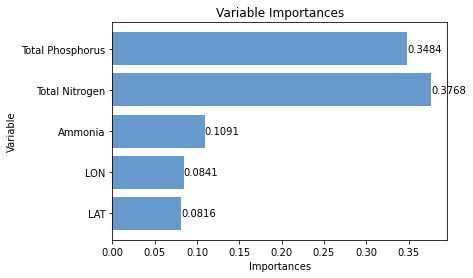

In [42]:
RF(clean1,"Productivity")

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
cost = np.array([])
degree = np.array([])
for i in range(1,10):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = poly.fit_transform(X_train)
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, y_train)
    poly_reg_y_predicted = poly_reg_model.predict(poly_features)
    poly_reg_rmse = np.sqrt(mean_squared_error(y_train,poly_reg_y_predicted))
    cost = np.append(cost, poly_reg_rmse)
    degree = np.append(degree, i)
print(cost, degree)

[0.00347306 0.00290206 0.00268348 0.00259565 0.0025735  0.00248011
 0.0024347  0.00239635 0.00231161] [1. 2. 3. 4. 5. 6. 7. 8. 9.]


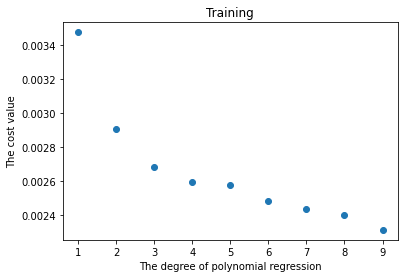

In [44]:
plt.scatter(degree, cost)
plt.xlabel('The degree of polynomial regression') 
plt.ylabel('The cost value')
plt.title("Training")
plt.show()

In [45]:
cost1 = np.array([])
degree1 = np.array([])
for i in range(1,10):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = poly.fit_transform(X_train)
    X_valid1 = poly.fit_transform(X_valid)
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, y_train)
    poly_reg_y_predicted1 = poly_reg_model.predict(X_valid1)
    poly_reg_rmse1 = np.sqrt(mean_squared_error(y_valid,poly_reg_y_predicted1))
    cost1 = np.append(cost1, poly_reg_rmse1)
    degree1 = np.append(degree1, i)
print(cost1, degree1)

[0.00352505 0.00319543 0.00304027 0.00395813 0.00509177 0.01053595
 0.02715971 0.06492127 0.09466149] [1. 2. 3. 4. 5. 6. 7. 8. 9.]


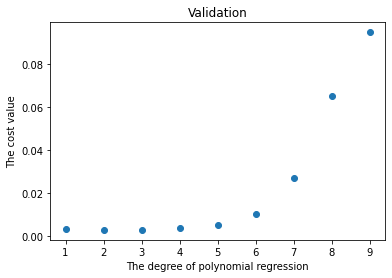

In [46]:
plt.scatter(degree1, cost1)
plt.xlabel('The degree of polynomial regression') 
plt.ylabel('The cost value')
plt.title("Validation")
plt.show()

In [47]:
#we choose degree 2 here

In [61]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_train)
poly_reg_model2 = LinearRegression()
poly_reg_model2.fit(poly_features, y_train)

LinearRegression()

In [62]:
X_test1 = poly.fit_transform(X_test)
y_pred = poly_reg_model2.predict(X_test1)

R2 score:  0.7278956058632621
RMSE： 0.0028331924150925567
   Actual values  Predicted Values
0        0.00298          0.002084
1        0.00839          0.009664
2        0.01502          0.011258
3        0.00030          0.001316
4        0.01002          0.008980


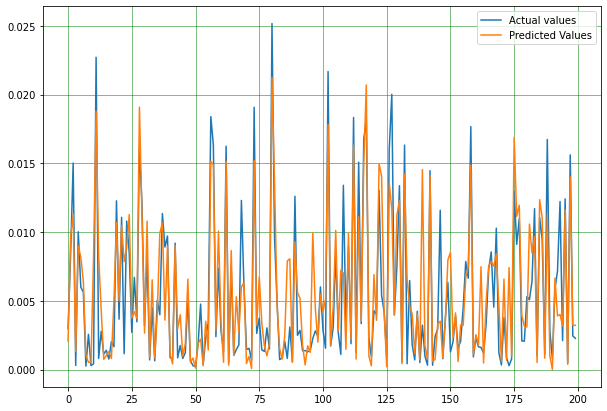

In [63]:
from sklearn.metrics import r2_score
print("R2 score: ", r2_score(y_test, y_pred))
print("RMSE：", np.sqrt(mean_squared_error(y_test, y_pred)))
''
#error
error_diff = pd.DataFrame({'Actual values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(error_diff.head(5))

#visualization
df1 = error_diff.head(200)
df1.plot(kind = 'line', figsize = (10,7))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

R2 score:  0.7241153918110199
RMSE:  0.0028528046167134837
   Actual values  Predicted Values
0        0.00298          0.002526
1        0.00839          0.010178
2        0.01502          0.011933
3        0.00030          0.001217
4        0.01002          0.008382


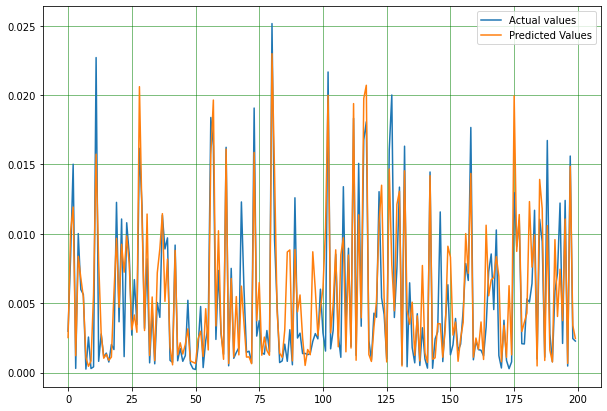

In [64]:
#Random forest regression 
regrRM2 = RandomForestRegressor(n_estimators=200, max_depth = 50, min_samples_split = 5,min_samples_leaf =4)
regrRM2.fit(X_train, y_train)

y_pred=regrRM2.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score: ",r2_score(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

#Error
error_diff = pd.DataFrame({'Actual values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(error_diff.head(5))

#Visualize the error
df1 = error_diff.head(200)
df1.plot(kind = 'line', figsize = (10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [65]:
poly_reg_model2.coef_

array([ 0.00272061, -0.00231287, -0.00010478, -0.00079697,  0.0009566 ])

In [66]:
poly_reg_model2.intercept_

0.005148098268462281

$y = 0.005148098268462281 + 0.00272061x_1 - 0.00231287x_2 - 0.00010478{x_1}^2 - 0.00079697{x_2}^2 + 0.0009566x_1x_2$

In [67]:
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from folium import plugins

In [74]:
m=folium.Map([40, -97],zoom_start=4)
HeatMap(clean_data[['LAT','LON']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

In [75]:
num=1000
lat = np.array(clean_data["LAT"][0:num])                        
lon = np.array(clean_data["LON"][0:num])                        
nit = np.array(clean_data["Total Nitrogen"][0:num],dtype=float)    
pho = np.array(clean_data["Total Phosphorus"][0:num],dtype=float) 
amm = np.array(clean_data["Ammonia"][0:num],dtype=float)
pro = np.array(clean_data["Productivity"][0:num],dtype=float) 
dfnt = [[lat[i],lon[i],nit[i]] for i in range(num)]
dfph = [[lat[i],lon[i],pho[i]] for i in range(num)]
dfam = [[lat[i],lon[i],amm[i]] for i in range(num)]
dfpr = [[lat[i],lon[i],pro[i]] for i in range(num)]

In [76]:
m1 = folium.Map(location=[40, -97],zoom_start=3)    
HeatMap(dfnt).add_to(m1) 
display(m1)

In [77]:
m2 = folium.Map(location=[40, -97],zoom_start=3)    
HeatMap(dfph).add_to(m2) 
display(m2)

In [78]:
m3 = folium.Map(location=[40, -97],zoom_start=3)    
HeatMap(dfam).add_to(m3) 
display(m3)

In [81]:
m4 = folium.Map(location=[40, -97],zoom_start=3)    
HeatMap(dfpr).add_to(m4) 
display(m4)